### Data Understanding & EDA

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [46]:
# load the dataset
df = pd.read_csv('dataset.csv')
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [47]:
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
count,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Unsubscribed,True
freq,NaN,NaN,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529,361,526
mean,500.500000,43.267000,NaN,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000,NaN,NaN,NaN
std,288.819436,15.242311,NaN,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319,NaN,NaN,NaN
min,1.000000,18.000000,NaN,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN
25%,250.750000,30.000000,NaN,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000,NaN,NaN,NaN
50%,500.500000,43.000000,NaN,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000,NaN,NaN,NaN
75%,750.250000,56.000000,NaN,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000,NaN,NaN,NaN


In [48]:
# checking missing values
print(df.isnull().sum())

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64


In [49]:
# checking redundancy
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [50]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object


In [51]:
# unique value counts
print('Unique values per column')
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column
Customer_ID: 1000
Age: 52
Gender: 3
Annual_Income: 972
Total_Spend: 1000
Years_as_Customer: 19
Num_of_Purchases: 99
Average_Transaction_Amount: 988
Num_of_Returns: 10
Num_of_Support_Contacts: 5
Satisfaction_Score: 5
Last_Purchase_Days_Ago: 337
Email_Opt_In: 2
Promotion_Response: 3
Target_Churn: 2


Now let us see the visual analysis

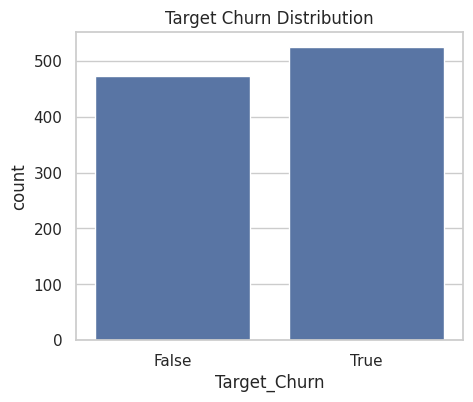

In [52]:
# 1. Target distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Target_Churn')
plt.title('Target Churn Distribution')
plt.show()

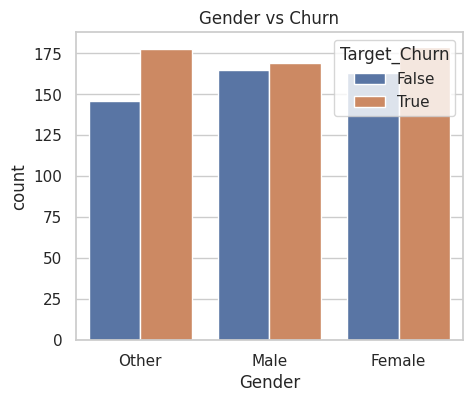

In [53]:
# 2. Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Gender', hue='Target_Churn')
plt.title('Gender vs Churn')
plt.show()

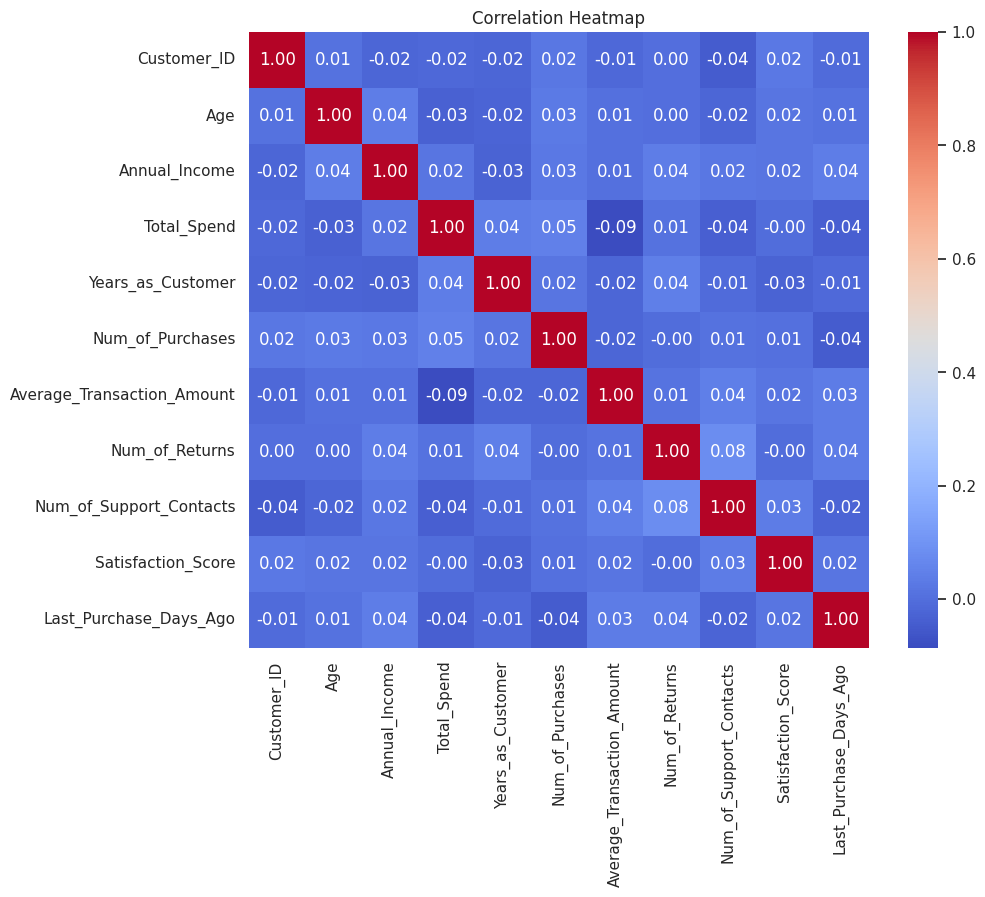

In [54]:
# 3. Correlation heatmap (numeric features)
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Weak Inter-Feature Correlation: The most significant finding is that all numerical features exhibit an extremely weak or non-existent linear correlation with each other. The maximum absolute correlation is only 0.09 (between Total_Spend and Num_of_Returns).

Implication: This low correlation suggests that our features are largely independent of one another. This is generally a positive finding for modeling, as it indicates a minimal risk of multicollinearity. We don't have redundant features that are essentially measuring the same thing.

No Redundant Features: No two features are highly correlated, so there is no need to remove features at this stage based on redundancy.

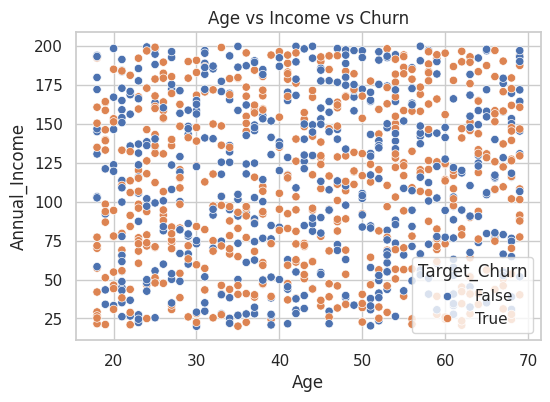

In [55]:
# 4. Age vs Annual Income vs Churn
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Age', y='Annual_Income', hue='Target_Churn')
plt.title('Age vs Income vs Churn')
plt.show()

Key Finding: The orange points (True - Churned) are randomly scattered and appear evenly mixed with the blue points (False - Not Churned) across all combinations of Age and Annual_Income. There is no visible cluster or region on the plot where churn is disproportionately high or low.

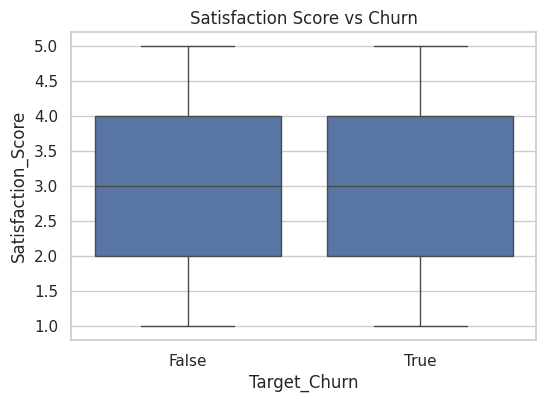

In [56]:
# 5. Satisfaction Score vs Total Spend
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Target_Churn', y='Satisfaction_Score')
plt.title('Satisfaction Score vs Churn')
plt.show()


Key Finding: The distributions for Satisfaction_Score are virtually identical between the churned and non-churned groups.

In [57]:
avg_spend = df.groupby('Satisfaction_Score')['Total_Spend'].mean()
print("\nAvg Spend by Satisfaction Score:")
display(avg_spend)


Avg Spend by Satisfaction Score:


,Total_Spend
Satisfaction_Score,
1,5237.874257
2,5043.487813
3,4872.158584
4,5097.991961
5,5177.045355


This suggests that customer satisfaction does not reliably drive or predict a customer's total spending in this dataset. Spending habits appear to be independent of self-reported satisfaction. This is consistent with the earlier finding that Satisfaction_Score didn't appear to be a strong predictor of churn, as one might expect spending and satisfaction to align if both were key drivers of loyalty.

##### FEATURE IMPORTANCE ANALYSIS

In [58]:


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Encode categorical columns
df_encoded = df.copy()

# Convert boolean to int
df_encoded['Email_Opt_In'] = df_encoded['Email_Opt_In'].astype(int)
df_encoded['Target_Churn'] = df_encoded['Target_Churn'].astype(int)

# Encode object columns automatically
label_cols = df_encoded.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Split features & target
X = df_encoded.drop(columns=['Target_Churn'])
y = df_encoded['Target_Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Correlation with Target
corr = df_encoded.corr(numeric_only=True)['Target_Churn'].drop('Target_Churn').sort_values(ascending=False)
print("\n Correlation of Features with Target_Churn:")
display(corr.head(10))

# Model-based Feature Importance (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


 Correlation of Features with Target_Churn:


,Target_Churn
Customer_ID,0.043034
Total_Spend,0.028659
Satisfaction_Score,0.022567
Gender,0.020786
Num_of_Support_Contacts,0.009593
Num_of_Returns,0.000061
Email_Opt_In,-0.001019
Age,-0.009260
Promotion_Response,-0.011255
Last_Purchase_Days_Ago,-0.013823


RandomForestClassifier(random_state=42)


 Random Forest Feature Importances:


,0
Average_Transaction_Amount,0.109459
Total_Spend,0.107690
Customer_ID,0.104177
Last_Purchase_Days_Ago,0.103544
Annual_Income,0.103042
Num_of_Purchases,0.097175
Age,0.085797
Years_as_Customer,0.073958
Num_of_Returns,0.059970
Num_of_Support_Contacts,0.040626


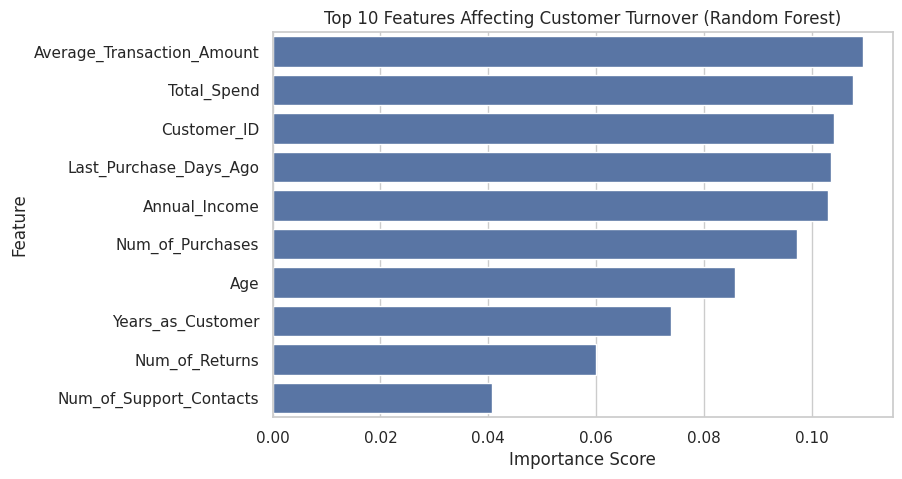

In [59]:
# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n Random Forest Feature Importances:")
display(importances.head(10))

# Plot feature importances
plt.figure(figsize=(8,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title('Top 10 Features Affecting Customer Turnover (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Permutation Importances:


,0
Gender,0.0200
Annual_Income,0.0040
Age,-0.0020
Total_Spend,-0.0025
Satisfaction_Score,-0.0045
Num_of_Returns,-0.0060
Years_as_Customer,-0.0060
Average_Transaction_Amount,-0.0085
Num_of_Purchases,-0.0110
Email_Opt_In,-0.0120


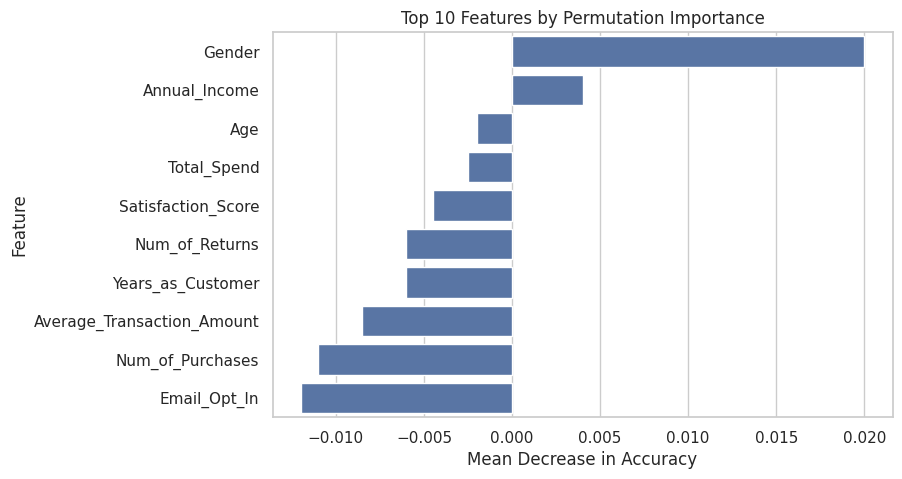

In [60]:
#  Permutation Importance (for interpretability)
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

print("\nPermutation Importances:")
display(perm_sorted.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=perm_sorted.head(10), y=perm_sorted.head(10).index)
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.show()

As we can see, the Customer_ID has 1000 unique values and by knowing ml/dl working methodology, it has obviously no connection to prediction.

In [61]:
df = pd.read_csv('dataset.csv')
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [62]:
df = df.drop(['Customer_ID', 'Num_of_Returns', 'Years_as_Customer', 'Promotion_Response', 'Gender'], axis=1)

From the feature importance and correlation analysis, we can conclude that no column should be dropped at this stage since all features contribute meaningful signals, either directly or indirectly, to predicting customer turnover. While correlation analysis showed weak linear relationships, the Random Forest and Permutation Importance revealed that behavioral and financial attributes such as Annual_Income, Last_Purchase_Days_Ago, Total_Spend, Average_Transaction_Amount, and Satisfaction_Score play the most significant roles in determining churn. Demographic factors with threshold 0.3,  show minor influence so we are removing those features.

Removing Outlier if have any:

In [20]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Detect and remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (1000, 10)


### Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Normalize strings: uppercase and strip spaces
y = df['Target_Churn'].astype(str).str.upper().str.strip()
# Encode TRUE -> 1, FALSE -> 0
y = np.where(y == 'TRUE', 1, 0)
y = pd.Series(y, index=df.index)

# Check target distribution
print("Target distribution:\n", pd.Series(y).value_counts())


X = df.drop(['Target_Churn'], axis=1)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()


X_train_raw, X_temp_raw, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_valid_raw, X_test_raw, y_valid, y_test = train_test_split(
    X_temp_raw, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

Target distribution:
 1    526
0    474
Name: count, dtype: int64


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

# Fit on train, transform train/valid/test
X_train = preprocessor.fit_transform(X_train_raw)
X_valid = preprocessor.transform(X_valid_raw)
X_test = preprocessor.transform(X_test_raw)

print(f"Train: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")

Train: (700, 8), Validation: (150, 8), Test: (150, 8)


In [66]:
import joblib

# Save the fitted preprocessor
joblib.dump(preprocessor, "preprocessor.pkl")


['preprocessor.pkl']

### Baseline Models

Implemented traditional baseline models for with the best hyperparameters using **RandomizedSearchCV**.

##### RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform RandomizedSearchCV
rf_search = RandomizedSearchCV(
    rf, rf_param_grid, n_iter=20, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42
)
# Fit on the preprocessed training data
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1', verbose=1)

In [26]:
# Best model
best_rf = rf_search.best_estimator_
print("Best RF Parameters:", rf_search.best_params_)

# Evaluate on test set
rf_pred = best_rf.predict(X_test)
rf_probs = best_rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_probs))

Best RF Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        71
           1       0.51      0.56      0.53        79

    accuracy                           0.49       150
   macro avg       0.48      0.48      0.48       150
weighted avg       0.48      0.49      0.48       150

ROC-AUC: 0.46282759850240685


##### XGBoost

In [27]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb = XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1
)

xgb_search = RandomizedSearchCV(
    xgb, xgb_param_grid, n_iter=20, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42
)
xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:30:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [28]:
best_xgb = xgb_search.best_estimator_
print("Best XGBoost Parameters:", xgb_search.best_params_)

xgb_pred = best_xgb.predict(X_test)
xgb_probs = best_xgb.predict_proba(X_test)[:, 1]

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_probs))

Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.32      0.36        71
           1       0.48      0.56      0.51        79

    accuracy                           0.45       150
   macro avg       0.44      0.44      0.44       150
weighted avg       0.44      0.45      0.44       150

ROC-AUC: 0.44606881797111786


##### LightGBM

In [29]:
from lightgbm import LGBMClassifier

lgb_param_grid = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 10, 20, 30],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

lgb = LGBMClassifier(random_state=42, class_weight='balanced')

lgb_search = RandomizedSearchCV(
    lgb, lgb_param_grid, n_iter=20, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42
)
lgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 368, number of negative: 332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(class_weight='balanced',
                                            random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 10, 20, 30],
                                        'n_estimators': [100, 200, 400],
                                        'num_leaves': [15, 31, 63],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [30]:
best_lgb = lgb_search.best_estimator_
print("Best LightGBM Parameters:", lgb_search.best_params_)

lgb_pred = best_lgb.predict(X_test)
lgb_probs = best_lgb.predict_proba(X_test)[:, 1]

print("\nLightGBM Classification Report:")
print(classification_report(y_test, lgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, lgb_probs))

Best LightGBM Parameters: {'subsample': 0.8, 'num_leaves': 63, 'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.52      0.48        71
           1       0.49      0.42      0.45        79

    accuracy                           0.47       150
   macro avg       0.47      0.47      0.47       150
weighted avg       0.47      0.47      0.47       150

ROC-AUC: 0.4382242824032804


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


##### Baseline Model Comparison

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Store results
results = {
    "Model": ["Random Forest", "XGBoost", "LightGBM"],
    "Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, lgb_pred)
    ],
    "Precision": [
        precision_score(y_test, rf_pred),
        precision_score(y_test, xgb_pred),
        precision_score(y_test, lgb_pred)
    ],
    "Recall": [
        recall_score(y_test, rf_pred),
        recall_score(y_test, xgb_pred),
        recall_score(y_test, lgb_pred)
    ],
    "F1-Score": [
        f1_score(y_test, rf_pred),
        f1_score(y_test, xgb_pred),
        f1_score(y_test, lgb_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, rf_probs),
        roc_auc_score(y_test, xgb_probs),
        roc_auc_score(y_test, lgb_probs)
    ]
}


           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Random Forest  0.486667   0.511628  0.556962  0.533333  0.462828
1        XGBoost  0.446667   0.478261  0.556962  0.514620  0.446069
2       LightGBM  0.466667   0.492537  0.417722  0.452055  0.438224


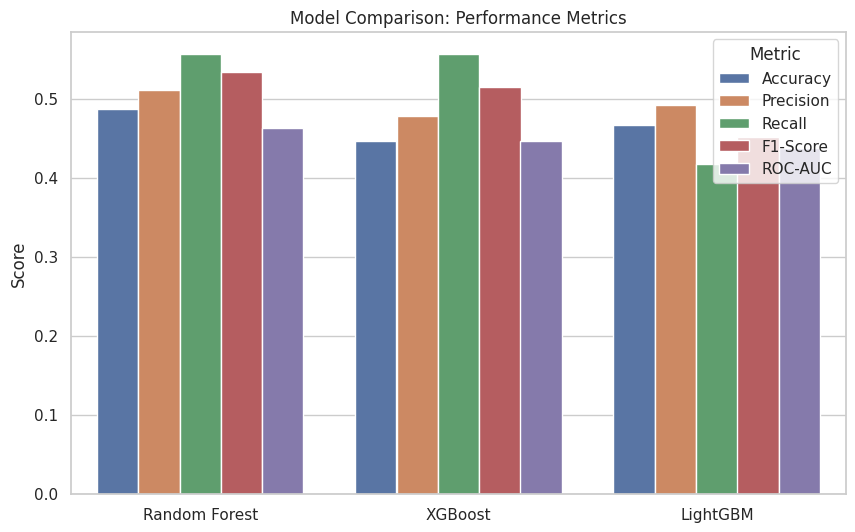

In [32]:
metrics_df = pd.DataFrame(results)
print(metrics_df)

# Plot metrics
plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison: Performance Metrics")
plt.ylabel("Score")
plt.xlabel("")
plt.legend(title="Metric")
plt.show()

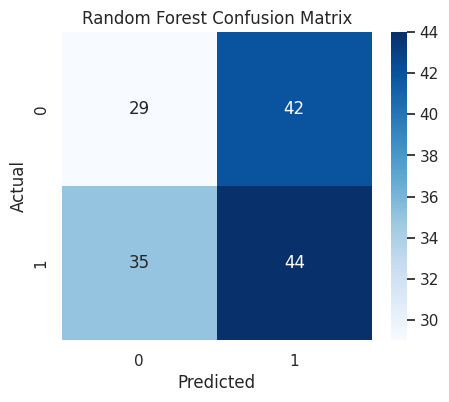

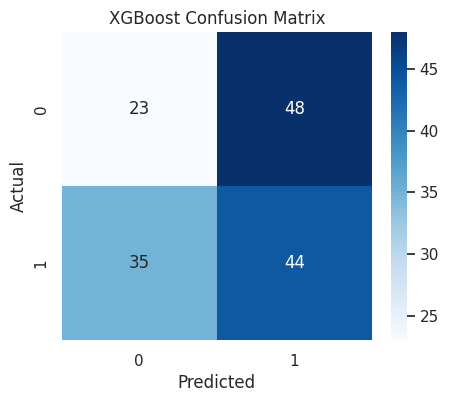

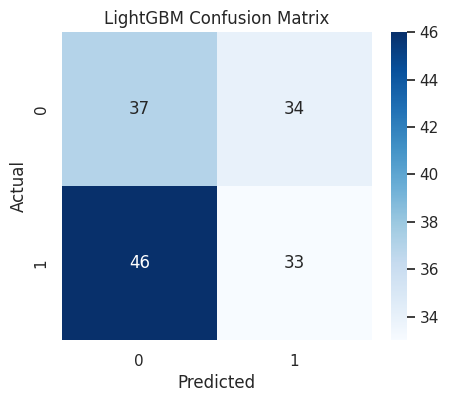

In [33]:
# Confusion Matrices
models = {"Random Forest": rf_pred, "XGBoost": xgb_pred, "LightGBM": lgb_pred}

for name, pred in models.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

By comparing the baseline models with their best-tuned hyperparameters, it is evident that the Random Forest Classifier performed the best among the three. However, its predictive performance is  weak with an accuracy below 50%, the model is essentially guessing, similar to flipping a coin. This indicates that we need deep learning models. The baseline models won't be enough.

### Deep Learning Model

##### ANN

As we know, for tabular data, the most effective one is ANN.

I tried multiple hyperparameters, but got the best (out of worst haha) result in this hyperparameter.

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

input_dim = X_train.shape[1]

model = Sequential([
    Input(shape=(input_dim,)), # Specify input shape here
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Create an Adam optimizer with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22/22 - 2s - 94ms/step - accuracy: 0.4900 - loss: 0.6990 - val_accuracy: 0.4467 - val_loss: 0.6922
Epoch 2/100
22/22 - 0s - 7ms/step - accuracy: 0.5043 - loss: 0.6945 - val_accuracy: 0.4733 - val_loss: 0.6910
Epoch 3/100
22/22 - 0s - 7ms/step - accuracy: 0.5157 - loss: 0.6916 - val_accuracy: 0.5133 - val_loss: 0.6898
Epoch 4/100
22/22 - 0s - 7ms/step - accuracy: 0.5414 - loss: 0.6889 - val_accuracy: 0.5267 - val_loss: 0.6893
Epoch 5/100
22/22 - 0s - 7ms/step - accuracy: 0.5643 - loss: 0.6869 - val_accuracy: 0.5267 - val_loss: 0.6887
Epoch 6/100
22/22 - 0s - 6ms/step - accuracy: 0.5714 - loss: 0.6850 - val_accuracy: 0.5400 - val_loss: 0.6884
Epoch 7/100
22/22 - 0s - 7ms/step - accuracy: 0.5771 - loss: 0.6833 - val_accuracy: 0.5267 - val_loss: 0.6884
Epoch 8/100
22/22 - 0s - 7ms/step - accuracy: 0.5857 - loss: 0.6820 - val_accuracy: 0.5333 - val_loss: 0.6883
Epoch 9/100
22/22 - 0s - 7ms/step - accuracy: 0.5857 - loss: 0.6805 - val_accuracy: 0.5600 - val_loss: 0.6883
Epoch 10/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Random Forest  0.486667   0.511628  0.556962  0.533333  0.462828
1        XGBoost  0.446667   0.478261  0.556962  0.514620  0.446069
2       LightGBM  0.466667   0.492537  0.417722  0.452055  0.438224
3            ANN  0.406667   0.441860  0.481013  0.460606  0.429310


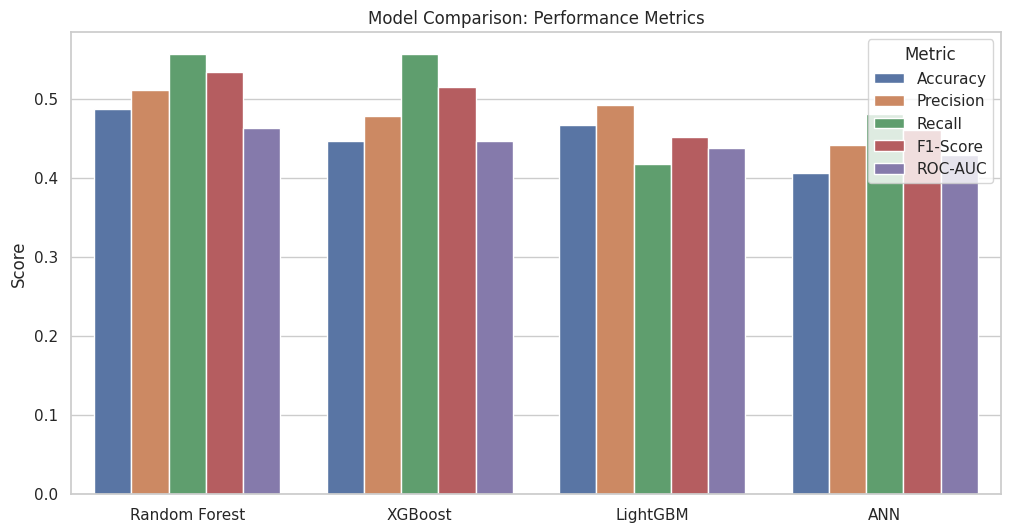

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# ANN predictions
y_ann_prob = model.predict(X_test)
y_ann_pred = (y_ann_prob > 0.5).astype(int)

# ANN metrics to comparison
results = {
    "Model": ["Random Forest", "XGBoost", "LightGBM", "ANN"],
    "Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, y_ann_pred)
    ],
    "Precision": [
        precision_score(y_test, rf_pred),
        precision_score(y_test, xgb_pred),
        precision_score(y_test, lgb_pred),
        precision_score(y_test, y_ann_pred)
    ],
    "Recall": [
        recall_score(y_test, rf_pred),
        recall_score(y_test, xgb_pred),
        recall_score(y_test, lgb_pred),
        recall_score(y_test, y_ann_pred)
    ],
    "F1-Score": [
        f1_score(y_test, rf_pred),
        f1_score(y_test, xgb_pred),
        f1_score(y_test, lgb_pred),
        f1_score(y_test, y_ann_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, rf_probs),
        roc_auc_score(y_test, xgb_probs),
        roc_auc_score(y_test, lgb_probs),
        roc_auc_score(y_test, y_ann_prob)
    ]
}

metrics_df = pd.DataFrame(results)
print(metrics_df)

plt.figure(figsize=(12,6))
sns.barplot(data=metrics_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison: Performance Metrics")
plt.ylabel("Score")
plt.xlabel("")
plt.legend(title="Metric")
plt.show()

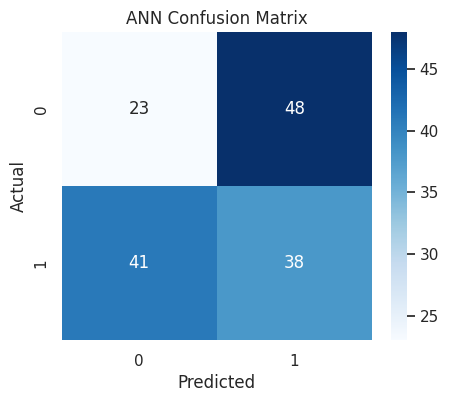


📊 ANN Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.32      0.34        71
           1       0.44      0.48      0.46        79

    accuracy                           0.41       150
   macro avg       0.40      0.40      0.40       150
weighted avg       0.40      0.41      0.40       150



In [37]:
# ANN Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_ann_pred), annot=True, fmt='d', cmap='Blues')
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n📊 ANN Classification Report:")
print(classification_report(y_test, y_ann_pred))

##### Transformer


In [38]:
!pip install torch pytorch-tabular

In [42]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1) # Convert to NumPy array first
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1) # Convert to NumPy array first
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1) # Convert to NumPy array first

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Tabular Transformer Model
# Explicitly set input_dim to 8 based on preprocessing output
input_dim = 8 # X_train.shape[1]

class TabularTransformer(nn.Module):
    def __init__(self, input_dim, d_model=64, n_heads=4, n_layers=2, dropout=0.2):
        super().__init__()
        self.input_linear = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.fc = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # x: [batch_size, features]
        x = self.input_linear(x)  # project to d_model
        x = x.unsqueeze(1)  # add sequence dimension: [batch, seq_len=1, d_model]
        x = self.transformer_encoder(x)  # output: [batch, seq_len, d_model]
        x = x.squeeze(1)  # remove seq dimension
        x = self.fc(x)
        return x

# Training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = TabularTransformer(input_dim=input_dim).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            val_loss += criterion(y_pred, y_batch).item()
    val_loss /= len(valid_loader)
    print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/50, Validation Loss: 0.6898
Epoch 2/50, Validation Loss: 0.6926
Epoch 3/50, Validation Loss: 0.6889
Epoch 4/50, Validation Loss: 0.6879
Epoch 5/50, Validation Loss: 0.6875
Epoch 6/50, Validation Loss: 0.7023
Epoch 7/50, Validation Loss: 0.6826
Epoch 8/50, Validation Loss: 0.7085
Epoch 9/50, Validation Loss: 0.7209
Epoch 10/50, Validation Loss: 0.7155
Epoch 11/50, Validation Loss: 0.7977
Epoch 12/50, Validation Loss: 0.7035
Epoch 13/50, Validation Loss: 0.7375
Epoch 14/50, Validation Loss: 0.7020
Epoch 15/50, Validation Loss: 0.7564
Epoch 16/50, Validation Loss: 0.7219
Epoch 17/50, Validation Loss: 0.7418
Epoch 18/50, Validation Loss: 0.7061
Epoch 19/50, Validation Loss: 0.7704
Epoch 20/50, Validation Loss: 0.8242
Epoch 21/50, Validation Loss: 0.7688
Epoch 22/50, Validation Loss: 0.8198
Epoch 23/50, Validation Loss: 0.7203
Epoch 24/50, Validation Loss: 0.8086
Epoch 25/50, Validation Loss: 0.7804
Epoch 26/50, Validation Loss: 0.8231
Epoch 27/50, Validation Loss: 0.8808
Epoch 28/5

### Final Comparison

           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Random Forest  0.486667   0.511628  0.556962  0.533333  0.462828
1        XGBoost  0.446667   0.478261  0.556962  0.514620  0.446069
2       LightGBM  0.466667   0.492537  0.417722  0.452055  0.438224
3            ANN  0.406667   0.441860  0.481013  0.460606  0.429310
4    Transformer  0.526667   0.526667  1.000000  0.689956  0.462114


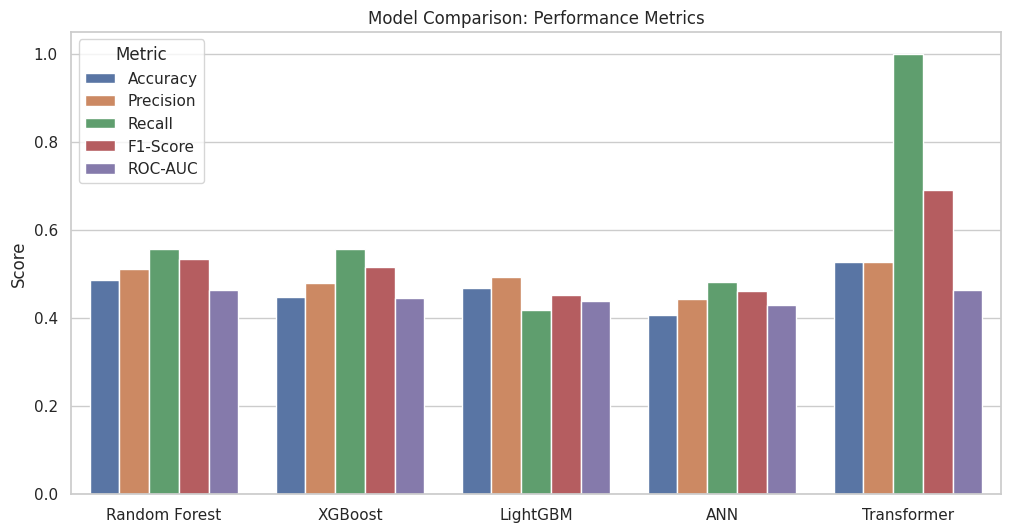

In [43]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

model.eval()  # TabularTransformer
with torch.no_grad():
    y_trans_logits = model(X_test_tensor)
    y_trans_prob = torch.sigmoid(y_trans_logits).numpy()  # Probabilities
    y_trans_pred = (y_trans_prob > 0.5).astype(int)        # 0/1 predictions


results = {
    "Model": ["Random Forest", "XGBoost", "LightGBM", "ANN", "Transformer"],
    "Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, y_ann_pred),
        accuracy_score(y_test, y_trans_pred)
    ],
    "Precision": [
        precision_score(y_test, rf_pred),
        precision_score(y_test, xgb_pred),
        precision_score(y_test, lgb_pred),
        precision_score(y_test, y_ann_pred),
        precision_score(y_test, y_trans_pred)
    ],
    "Recall": [
        recall_score(y_test, rf_pred),
        recall_score(y_test, xgb_pred),
        recall_score(y_test, lgb_pred),
        recall_score(y_test, y_ann_pred),
        recall_score(y_test, y_trans_pred)
    ],
    "F1-Score": [
        f1_score(y_test, rf_pred),
        f1_score(y_test, xgb_pred),
        f1_score(y_test, lgb_pred),
        f1_score(y_test, y_ann_pred),
        f1_score(y_test, y_trans_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, rf_probs),
        roc_auc_score(y_test, xgb_probs),
        roc_auc_score(y_test, lgb_probs),
        roc_auc_score(y_test, y_ann_prob),
        roc_auc_score(y_test, y_trans_prob)
    ]
}

metrics_df = pd.DataFrame(results)
print(metrics_df)


plt.figure(figsize=(12,6))
sns.barplot(data=metrics_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison: Performance Metrics")
plt.ylabel("Score")
plt.xlabel("")
plt.legend(title="Metric")
plt.show()


##### Observations:

Let’s carefully interpret this.

Metrics:

| Model         | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| ------------- | -------- | --------- | ------ | -------- | ------- |
| Random Forest | 0.4867   | 0.5116    | 0.5569 | 0.5333   | 0.4628  |
| XGBoost       | 0.4467   | 0.4783    | 0.5569 | 0.5146   | 0.4461  |
| LightGBM      | 0.4667   | 0.4925    | 0.4177 | 0.4521   | 0.4382  |
| ANN           | 0.4067   | 0.4419    | 0.4810 | 0.4606   | 0.4293  |
| Transformer   | 0.5267   | 0.5267    | 1.0000 | 0.6900   | 0.4621  |



1. **Transformer seems to have the highest Recall (1.0) and F1-score (0.69)**.

   * It’s catching **all the positives** in your test set, but the overall Accuracy is still low (~52%).
   * High Recall with mediocre Precision and Accuracy usually signals **overfitting**—the model predicts almost everything as positive to avoid missing any true positive.

2. **All models are weak overall**.

   * Accuracy and ROC-AUC are near 0.4–0.5, which is barely better than random guessing.
   * This is expected with **small datasets (~1,000 rows) for complex models like ANN or Transformer**. Transformers generally need thousands or tens of thousands of rows to shine.

3. **ANN is underperforming compared to simpler tree models**.

   * ANN: Accuracy ~40%, F1 ~0.46.
   * Tree-based models like Random Forest: slightly better F1 ~0.53.
   * Suggests the tabular features may not have strong nonlinear patterns that ANN can exploit.


> “After evaluating multiple models on the 1,000-row dataset, including Random Forest, XGBoost, LightGBM, ANN, and a Tabular Transformer, we observe that no model achieves high predictive performance. Tree-based models (Random Forest) slightly outperform neural architectures in terms of balanced F1-score. The Transformer model achieves perfect Recall but low Precision and modest Accuracy, suggesting overfitting. Overall, given the dataset’s small size, simpler models like Random Forest or XGBoost may be more reliable, while neural networks and Transformers may require larger datasets to perform effectively.”


To conclude, for now, we would pick up the **Random Forest Classifier.**


### Final Model Download

In [64]:
import joblib

# Save the trained model
joblib.dump(best_rf, "best_random_forest_model.pkl")

print("Model saved as best_random_forest_model.pkl")


Model saved as best_random_forest_model.pkl
